# Prosper Loan Dataset Exploration

## by Noaman Mangera

### Preliminary Wrangling

This document explores a dataset containing attributes for approximately 110,00 loans made with the p2p lending firm Prosper.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#set plots within notebook environment
%matplotlib inline

In [2]:
#read in dataset
df = pd.read_csv(r'C:\Users\noama\prosperLoanData.csv')

In [3]:
#view first five rows of the dataset
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# view number of rows and columns 
df.shape

(113937, 81)

**Observations:**

The entire dataset contains 113,937 rows (loans) and 81 variables (features). The focus for this project will be a subset of these variables.

In [5]:
#isolate variables of interest  
columns = ['MemberKey', 'BorrowerAPR', 'CreditGrade', 'Term', 'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration'
           , 'OpenRevolvingAccounts', 'CurrentDelinquencies', 'AmountDelinquent', 'DebtToIncomeRatio', 'Recommendations', 'InvestmentFromFriendsCount'
           , 'InvestmentFromFriendsAmount', 'PercentFunded', 'Investors']

#create a new df with subset of variables
sub_df = df.loc[:, columns]
sub_df.head()

,MemberKey,BorrowerAPR,CreditGrade,Term,ProsperScore,EmploymentStatus,EmploymentStatusDuration,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,PercentFunded,Investors
0,1F3E3376408759268057EDA,0.16516,C,36,NaN,Self-employed,2.0,1,2.0,472.0,0.17,0,0,0.0,1.0,258
1,1D13370546739025387B2F4,0.12016,NaN,36,7.0,Employed,44.0,13,0.0,0.0,0.18,0,0,0.0,1.0,1
2,5F7033715035555618FA612,0.28269,HR,36,NaN,Not available,NaN,0,1.0,NaN,0.06,0,0,0.0,1.0,41
3,9ADE356069835475068C6D2,0.12528,NaN,36,9.0,Employed,113.0,7,4.0,10056.0,0.15,0,0,0.0,1.0,158
4,36CE356043264555721F06C,0.24614,NaN,36,4.0,Employed,44.0,6,0.0,0.0,0.26,0,0,0.0,1.0,20


In [6]:
# view number of rows and columns in subset
sub_df.shape

(113937, 16)

In [7]:
# view columns names and data types in subset
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MemberKey                    113937 non-null  object 
 1   BorrowerAPR                  113912 non-null  float64
 2   CreditGrade                  28953 non-null   object 
 3   Term                         113937 non-null  int64  
 4   ProsperScore                 84853 non-null   float64
 5   EmploymentStatus             111682 non-null  object 
 6   EmploymentStatusDuration     106312 non-null  float64
 7   OpenRevolvingAccounts        113937 non-null  int64  
 8   CurrentDelinquencies         113240 non-null  float64
 9   AmountDelinquent             106315 non-null  float64
 10  DebtToIncomeRatio            105383 non-null  float64
 11  Recommendations              113937 non-null  int64  
 12  InvestmentFromFriendsCount   113937 non-null  int64  
 13 

In [8]:
# convert Credit Grade and Prosper Score variables into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
                    'ProsperScore': [11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
                    'Term': [12, 36, 60],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
                                         'Part-time', 'Not employed', 'Retired']}

#loop over dictionary of variables and convert to categorical data type 
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    sub_df[var] = sub_df[var].astype(ordered_var)
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   MemberKey                    113937 non-null  object  
 1   BorrowerAPR                  113912 non-null  float64 
 2   CreditGrade                  28953 non-null   category
 3   Term                         113937 non-null  category
 4   ProsperScore                 84853 non-null   category
 5   EmploymentStatus             111682 non-null  category
 6   EmploymentStatusDuration     106312 non-null  float64 
 7   OpenRevolvingAccounts        113937 non-null  int64   
 8   CurrentDelinquencies         113240 non-null  float64 
 9   AmountDelinquent             106315 non-null  float64 
 10  DebtToIncomeRatio            105383 non-null  float64 
 11  Recommendations              113937 non-null  int64   
 12  InvestmentFromFriendsCount   113937 non-null

In [9]:
#user defined function to calculate missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * (df.isnull().sum() / len(df))
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [10]:
#apply user defined function over subset of data
missing_values_table(sub_df)

Your selected dataframe has 16 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
CreditGrade,84984,74.6
ProsperScore,29084,25.5
DebtToIncomeRatio,8554,7.5
EmploymentStatusDuration,7625,6.7
AmountDelinquent,7622,6.7
EmploymentStatus,2255,2.0
CurrentDelinquencies,697,0.6
BorrowerAPR,25,0.0


**Observations:**

Credit Grade and Prosper Score have a significant portion of "missing" values. From the documentation, it appears Credit Grade was used prior to 2009, while Prosper Score was applied subsequently. The two variables can thus be considered one metric. Feature engineering to merge the two is an option. Another is to consider each on its own merit, and compare the efficacy of each against each other. 

In [11]:
# Check for duplicates
sub_df.duplicated().sum()

0

### What is the structure of your dataset?

There are 113,937 loans. Most variables are numeric, but the variables CreditGrade and ProsperScore are ordered factor variables with the following levels.

(best) ——> (worst)

CreditGrade: AA, A, B, C, D, E, NC

ProsperScore: 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1


### What is/are the main feature(s) of interest in your dataset?

The main feature considered here is the Borrower's Annual Percentage Rate (APR) for a loan. The main research question can be stated as:   

> What affects a borrower’s APR or interest rate?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
> 2. Term: The length of the loan expressed in months.
> 3. ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> 4. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
> 5. EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.
> 6. OpenRevolvingAccounts: Number of open revolving accounts at the time the credit profile was pulled.
> 7. CurrentDelinquencies:	Number of accounts delinquent at the time the credit profile was pulled.
> 8. AmountDelinquent: Dollars delinquent at the time the credit profile was pulled.
> 9. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. 
> 10. MemberKey:	The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
> 11. Recommendations:	Number of recommendations the borrower had at the time the listing was created.
> 12. InvestmentFromFriendsCount:	Number of friends that made an investment in the loan.
> 13. InvestmentFromFriendsAmount:	Dollar amount of investments that were made by friends.
> 14. PercentFunded:	Percent the listing was funded.
> 15. Investors:	The number of investors that funded the loan.

## Univariate Exploration

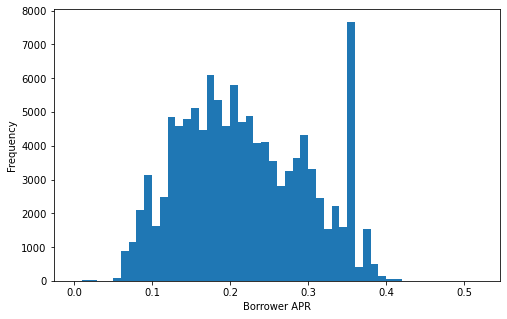

In [12]:
# create bin width
binsize = 0.01
bins = np.arange(0, sub_df['BorrowerAPR'].max()+binsize, binsize)

# plot distribution of main variable of interest
plt.figure(figsize=[8, 5])
plt.hist(data = sub_df, x = 'BorrowerAPR', bins = bins)

#give x and y axis labels
plt.xlabel('Borrower APR')
plt.ylabel('Frequency');

**Observations**

- Distribution appears normal with a spike at around 0.36 APR. This probably represents a standard rate loan.

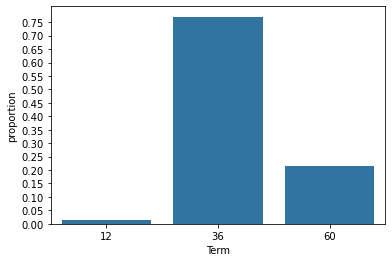

In [13]:
#use number of observations and total oberservations to calculate proportion
n_points = sub_df.shape[0]
max_count = sub_df['Term'].value_counts().max()
max_prop = max_count / n_points

# tick mark locations and names to 2 d.p
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props] 

#uniform color for visualisation
base_color = sb.color_palette()[0] 

# create and display  plot
sb.countplot(data = sub_df, x = 'Term', color = base_color)

#y ticks marks and labels
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

Observations

- The most common type of loan in this dataset has a duration of 36 months, followed by 60 and 12.

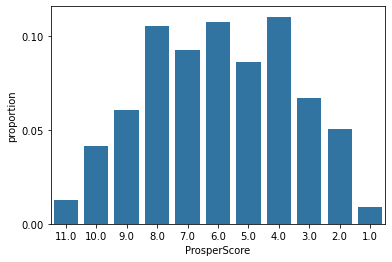

In [14]:
#use number of observations and total oberservations to calculate proportion
n_points = sub_df.shape[0]
max_count = sub_df['ProsperScore'].value_counts().max()
max_prop = max_count / n_points

# tick mark locations and names to 2 d.p
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props] 

#uniform color
base_color = sb.color_palette()[0] 

# create and display plot
sb.countplot(data = sub_df, x = 'ProsperScore', color = base_color)

#y ticks marks and labels
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

**Observations:**

- normal distribution, with a median ProsperScore of around 6. In other words, a "middling" rating.

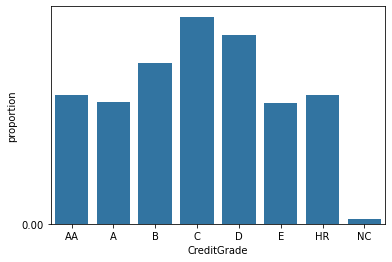

In [15]:
#use number of observations and total oberservations to calculate proportion
n_points = sub_df.shape[0]
max_count = sub_df['CreditGrade'].value_counts().max()
max_prop = max_count / n_points

# tick mark locations and names to 2 d.p
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props] 

#uniform color
base_color = sb.color_palette()[0] 

# create and display plot
sb.countplot(data = sub_df, x = 'CreditGrade', color = base_color)

#y ticks marks and labels
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

**Observations:**

- normal distribution, with a median CreditGrade C. In other words, a "middling" rating.

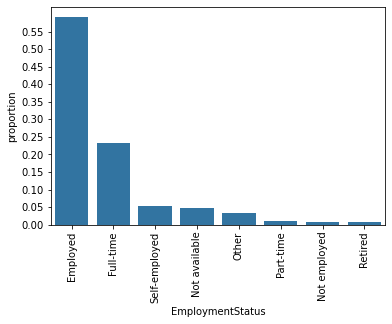

In [16]:
#use number of observations and total oberservations to calculate proportion
n_points = sub_df.shape[0]
max_count = sub_df['EmploymentStatus'].value_counts().max()
max_prop = max_count / n_points

# tick mark locations and names to 2 d.p
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props] 

#uniform color
base_color = sb.color_palette()[0]

# create the plot
sb.countplot(data = sub_df, x = 'EmploymentStatus', color = base_color)

# shift labels to avoid overlap
plt.xticks(rotation=90) 

#y ticks marks and labels
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

**Observations:**

- most applicants are in some form of employment.

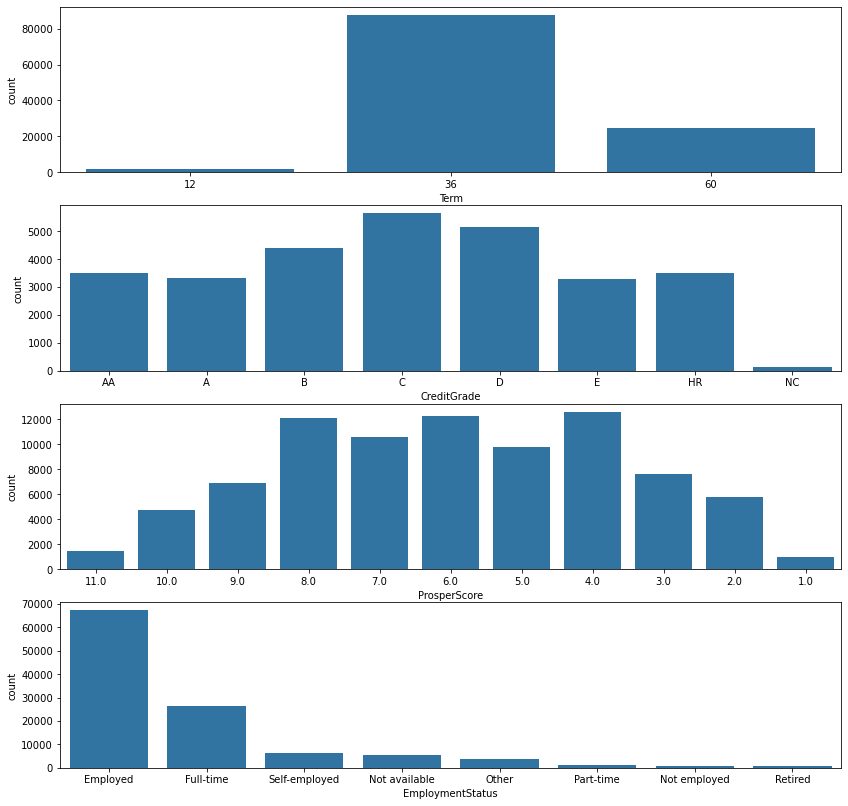

In [17]:
#create figure and axis objects
fig, ax = plt.subplots(nrows=4, figsize = [14,14])

#uniform color
default_color = sb.color_palette()[0]

#all four catergorical plots together
sb.countplot(data = sub_df, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = sub_df, x = 'CreditGrade', color = default_color, ax = ax[1])
sb.countplot(data = sub_df, x = 'ProsperScore', color = default_color, ax = ax[2])
sb.countplot(data = sub_df, x = 'EmploymentStatus', color = default_color, ax = ax[3]);

**Observations:**

Profile of a "standard" loan application:
    - 36 Month Term
    - C/4 Credit Grade/ProsperScore
    - Employed Status

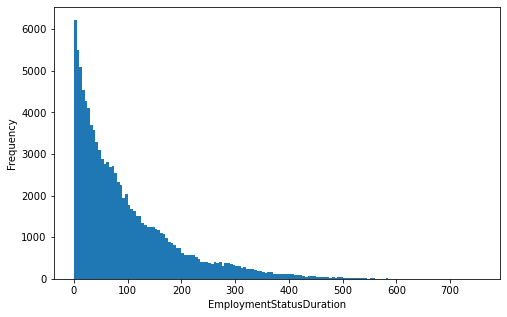

In [18]:
# create bin width
binsize = 5
bins = np.arange(0, sub_df['EmploymentStatusDuration'].max()+binsize, binsize)

# plot distribution of variable 
plt.figure(figsize=[8, 5])
plt.hist(data = sub_df, x = 'EmploymentStatusDuration', bins = bins)

#give x and y axis labels
plt.xlabel('EmploymentStatusDuration')
plt.ylabel('Frequency');

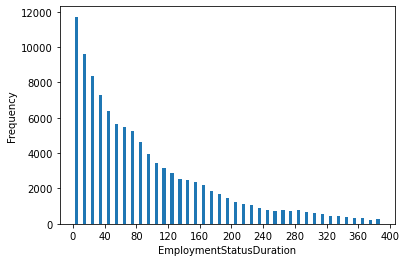

In [19]:
# create bin width
bin_edges = np.arange(0, 400, 10)

# plot distribution of variable as discrete
plt.hist(sub_df['EmploymentStatusDuration'], bins = bin_edges, rwidth = 0.4)

#x axis ticks and labels
plt.xticks(np.arange(0, 400+10, 40))
plt.xlabel('EmploymentStatusDuration')
plt.ylabel('Frequency');

**Observations:**

- Right tailed distribution, with the bulk of observations for employment duration at the low end, and few at the high end. 

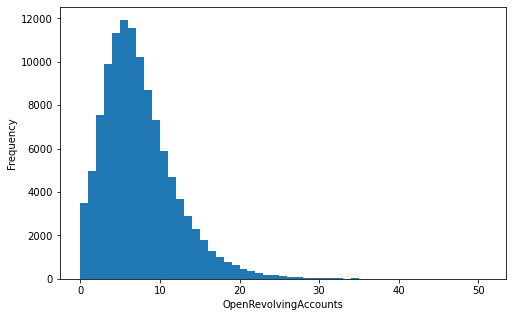

In [20]:
# create bin width
binsize = 1
bins = np.arange(0, sub_df['OpenRevolvingAccounts'].max()+binsize, binsize)

# plot distribution of variable 
plt.figure(figsize=[8, 5])
plt.hist(data = sub_df, x = 'OpenRevolvingAccounts', bins = bins)

#give x and y axis labels
plt.xlabel('OpenRevolvingAccounts')
plt.ylabel('Frequency');

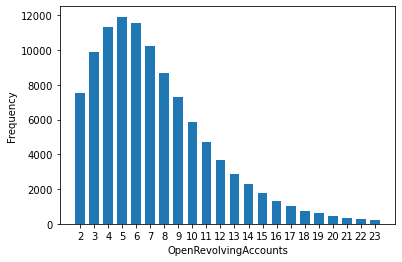

In [21]:
# create bin width
bin_edges = np.arange(1.5, 23.5+1, 1)

# plot distribution of variable as discrete
plt.hist(sub_df['OpenRevolvingAccounts'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(2, 23+1, 1))
plt.xlabel('OpenRevolvingAccounts')
plt.ylabel('Frequency');

**Observations:**

- right tailed, unimodal with peak at 5.

In [22]:
#raw count of unique observations (top 5)
sub_df['CurrentDelinquencies'].value_counts().head()

0.0    89742
1.0    11716
2.0     4357
3.0     2098
4.0     1379
Name: CurrentDelinquencies, dtype: int64

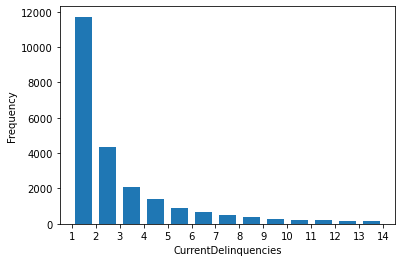

In [23]:
# create bin width
bin_edges = np.arange(1, 15, 1)

# plot distribution of variable as discrete
plt.hist(sub_df['CurrentDelinquencies'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(1, 15, 1))
plt.xlabel('CurrentDelinquencies')
plt.ylabel('Frequency');

**Observations:**

- ~80% of loan applicants have zero delinquencies. The above therefore excludes this "extreme" value to focus on the remaining data. 

In [24]:
#raw count of unique observations (top 5)
sub_df['AmountDelinquent'].value_counts().head()

0.0      89818
50.0        73
100.0       67
25.0        66
30.0        65
Name: AmountDelinquent, dtype: int64

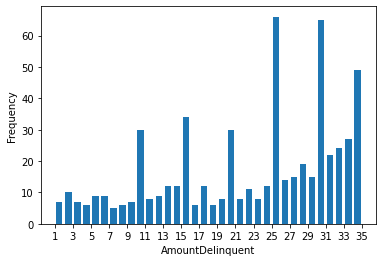

In [25]:
# create bin width
bin_edges = np.arange(1, 35+1, 1)

# plot distribution of variable as discrete
plt.hist(sub_df['AmountDelinquent'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(1, 35+1, 2))
plt.xlabel('AmountDelinquent')
plt.ylabel('Frequency');

**Oberservation:**

- ~80% of loan applciactions are those with a zero balance outstanding (delinquencies). After stripping these out the distrubtion of the variable is left tail, with the higher count of observations made for applciations with greater amount outstanding. 

- Also periodic spikes at regular intervals. 

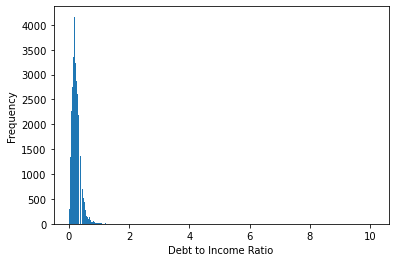

In [26]:
# create bin width
bins_edges = np.arange(sub_df.DebtToIncomeRatio.min(), sub_df.DebtToIncomeRatio.max()+0.1, 0.01)

# plot distribution of variable
plt.hist(data=sub_df, x='DebtToIncomeRatio', bins=bins_edges)

#x axis ticks and labels
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency');

In [27]:
#numerical summary of variable
sub_df['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

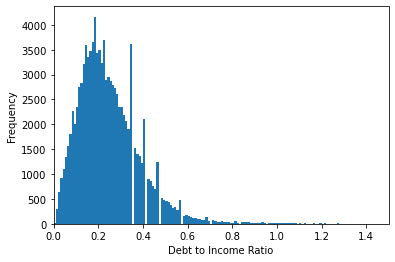

In [28]:
# plot distribution of variable
plt.hist(data=sub_df, x='DebtToIncomeRatio', bins=bins_edges)

#limit x axis to bulk of distruction and label axis
plt.xlim(0,1.5);
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency');

**Oberservations:**

- Outliers, with a mean greater than the median. The resulting distribution is skewed to the right.
- Also periodic spikes at regular intervals. 

In [29]:
#raw count of unique obsevations (top 5)
sub_df['Recommendations'].value_counts().head()

0    109678
1      3516
2       568
3       108
4        26
Name: Recommendations, dtype: int64

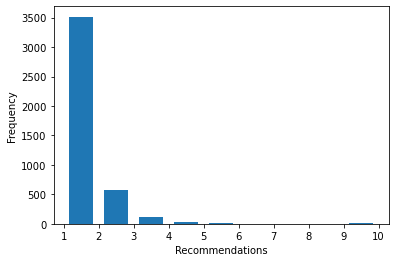

In [30]:
# create bin width
bin_edges = np.arange(1, 10+1, 1)

# plot distribution of variable as discrete
plt.hist(sub_df['Recommendations'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(1, 10+1, 1))
plt.xlabel('Recommendations')
plt.ylabel('Frequency');

**Observations:**

- ~90% of records have zero recommendations.

In [31]:
#raw count of unique observations (top 5)
sub_df['InvestmentFromFriendsCount'].value_counts().head()

0    111806
1      1835
2       215
3        40
4        15
Name: InvestmentFromFriendsCount, dtype: int64

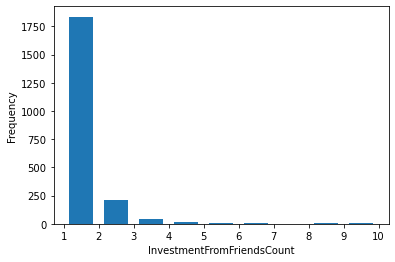

In [32]:
# create bin width
bin_edges = np.arange(1, 10+1, 1)

# plot distribution of variable as discrete
plt.hist(sub_df['InvestmentFromFriendsCount'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(1, 10+1, 1))
plt.xlabel('InvestmentFromFriendsCount')
plt.ylabel('Frequency');

**Observations:**

- ~99% of records have zero InvestmentFromFriendsCount.

In [33]:
#raw count of unique observations 
sub_df['InvestmentFromFriendsAmount'].value_counts()

0.00       111806
50.00         323
100.00        242
1000.00       100
500.00         97
            ...  
48.51           1
102.34          1
53.27           1
953.33          1
501.99          1
Name: InvestmentFromFriendsAmount, Length: 726, dtype: int64

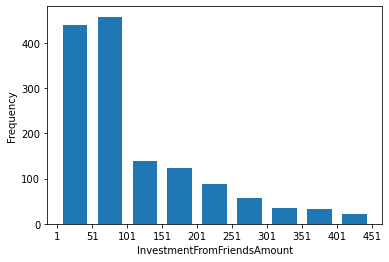

In [34]:
# create bin width
bin_edges = np.arange(1, 500+1, 50)

# plot distribution of variable as discrete
plt.hist(sub_df['InvestmentFromFriendsAmount'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(1, 500+1, 50))
plt.xlabel('InvestmentFromFriendsAmount')
plt.ylabel('Frequency');

**Observations:**

- ~99% of records have zero InvestmentFromFriendsAmount, congruent with the above variable.

In [35]:
sub_df['PercentFunded'].value_counts()

1.0000    113067
0.9998         5
0.7000         4
0.8087         4
0.7784         3
           ...  
0.8167         1
0.7854         1
0.7903         1
0.7167         1
0.9575         1
Name: PercentFunded, Length: 719, dtype: int64

**Observations:**

- ~99% of records are fully funded.

In [36]:
#raw count of unique observations
sub_df['Investors'].value_counts()

1      27814
2       1386
3        991
4        827
5        753
       ...  
881        1
801        1
752        1
715        1
831        1
Name: Investors, Length: 751, dtype: int64

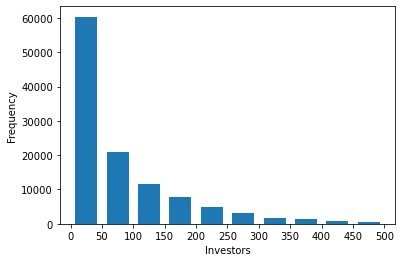

In [37]:
# create bin width
bin_edges = np.arange(0, 500+1, 50)

# plot distribution of variable as discrete
plt.hist(sub_df['Investors'], bins = bin_edges, rwidth = 0.7) 

#x axis ticks and labels
plt.xticks(np.arange(0, 500+1, 50))
plt.xlabel('Investors')
plt.ylabel('Frequency');

**Observations:**

- Congruent with the findings on Percent Funded.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. Large spike at 0.36 APR. This probably represent a rate offered for standard loans.
> 2. AmountDelinquent and DebttoIncomeRatio have periodic spikes at regular intervals. 
> 3. Over 80% of the oberservations for CurrentDelinquencies and Amount Delinquent contain a value of zero. These are probably valid as applicants are likely to be first time borrowers. 
> 4. DebtToIncome contains outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. To make visible the remaining distribution the value of zero is omitted from the visualisations for CurrentDelinquincies, AmountDelinquent, Recommendations, InvestmentFromFriendsAmount, InvestmentFromFriendsCount.
> 2. DebtToIncome ratio contains outlier value(s) far from the bulk of the distribution. The x-axis is truncated to magnify the bulk of the distribution.

## Bivariate Exploration


In [38]:
#isolate numeric variables
numeric_vars = ['BorrowerAPR', 'EmploymentStatusDuration' , 'OpenRevolvingAccounts', 'CurrentDelinquencies',
                'AmountDelinquent', 'DebtToIncomeRatio', 'Recommendations', 'InvestmentFromFriendsCount'
                , 'InvestmentFromFriendsAmount', 'Investors']

#isolate categorical variables
categoric_vars = ['CreditGrade', 'Term', 'EmploymentStatus', 'ProsperScore']

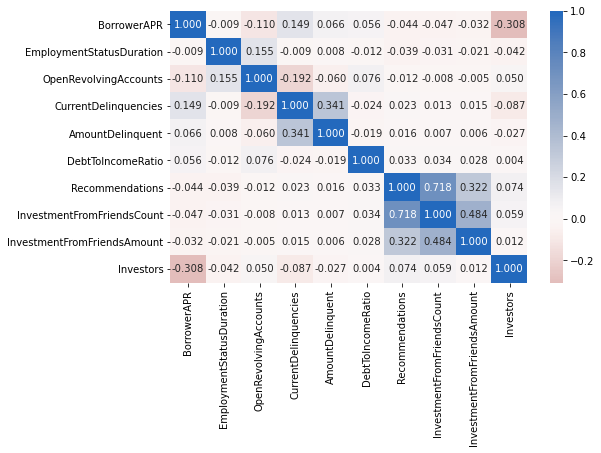

In [39]:
# correlation plot of numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(sub_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

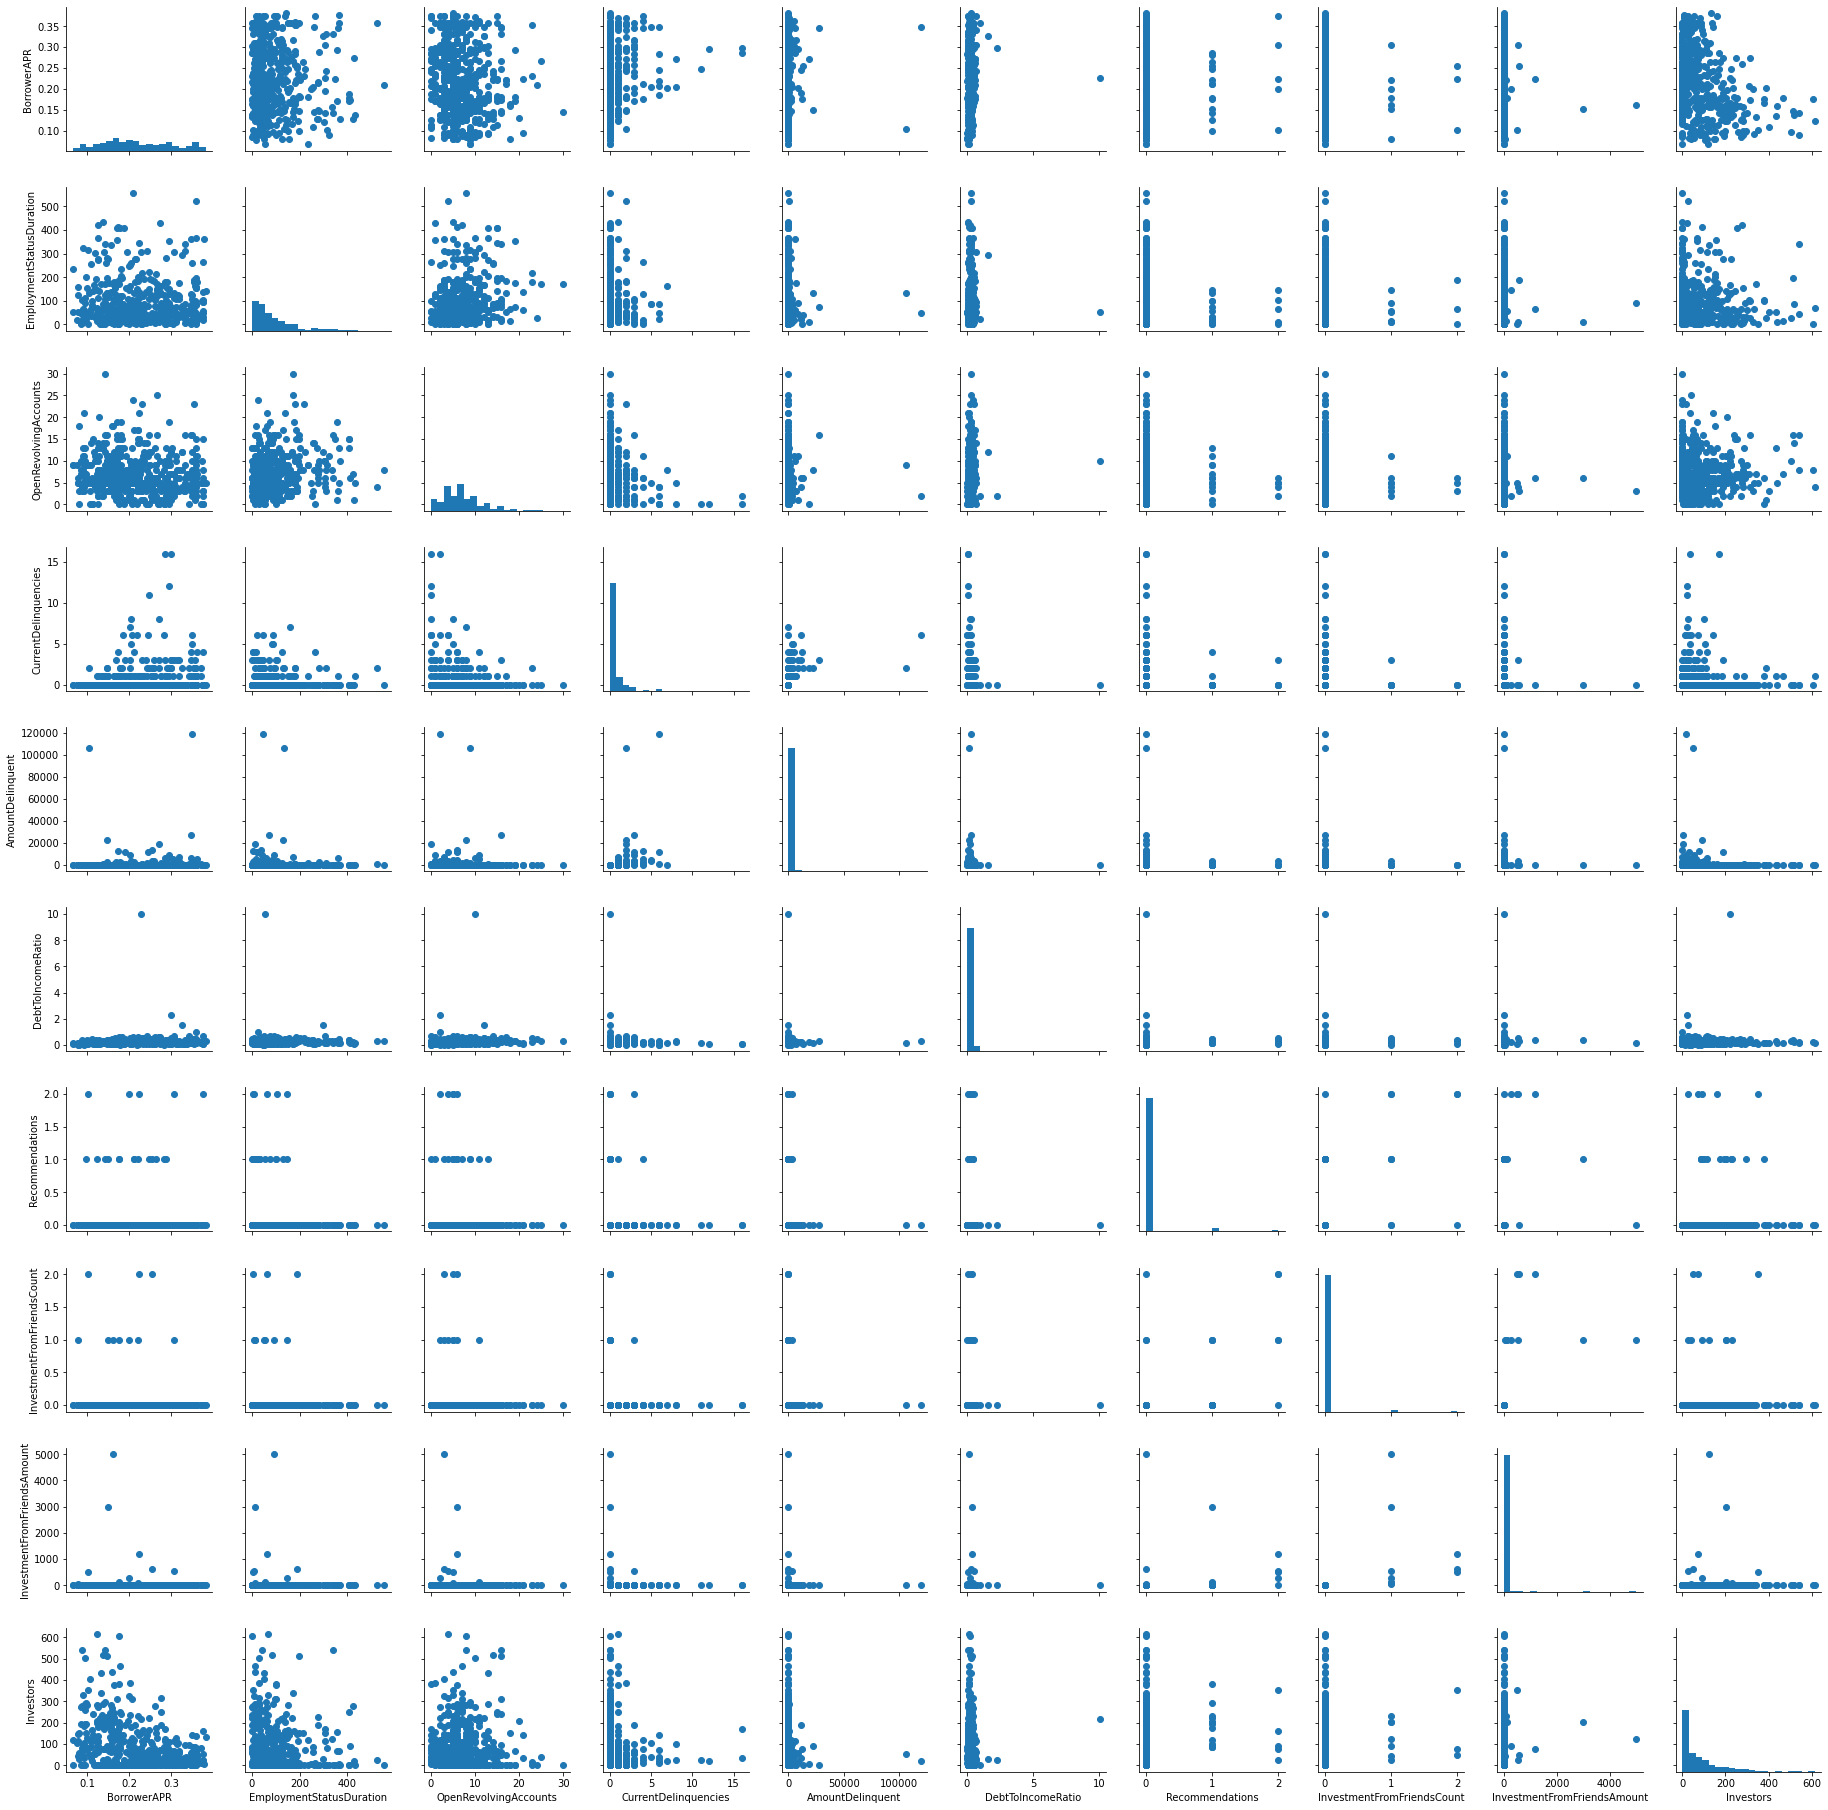

In [40]:
#draw random sample of 500 observations
samples = np.random.choice(sub_df.shape[0], 500, replace = False)
loans_samp = sub_df.loc[samples,:]

#pairwise scatter plots of variables using sample 
g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

**Observations:**

- Borrower APR does not appear to be strongly correlated with any of the numeric variables.
- Weak/Mild pairwise correlations between AmountDelinquent & CurrentDelinquencies, InvestmentFromFriends & Recommendations, InvestmentFromFriendsCount & InvestmentFromFirendsAmount

C:\Users\noama\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

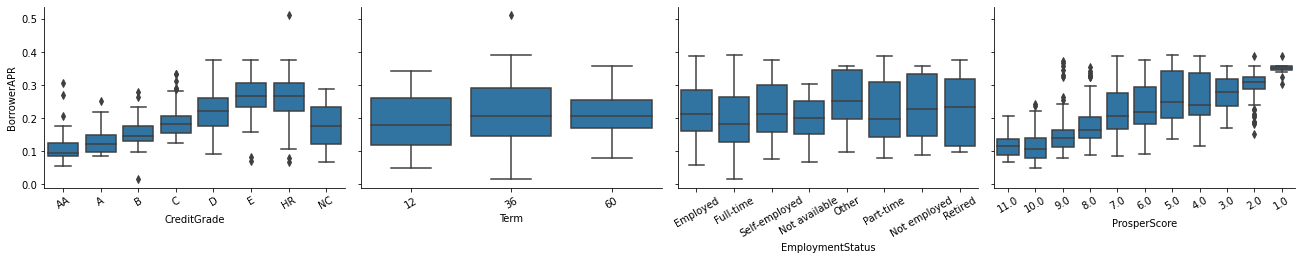

In [41]:
#draw random sample of 500 observations
samples = np.random.choice(sub_df.shape[0], 2000, replace = False)
loans_samp = sub_df.loc[samples,:]

#user defined function to plot multiple boxplots of categorical variables
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=30) ;

#boxplot of categorical variables using sample
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans_samp, y_vars = ['BorrowerAPR'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid);

**Observations:**

- As expected, CreditGrade and ProsperScore have a clear effect on the rate of Borrower APR, with lower ratings correlated with higher rates of interest.
- The IQR for Term is largest for shorter term loans suggesting other variables also play a role in determining the rate of APR.
- The employment status "employed" does not appear to have a significant difference (vis-vis most of the other categories), to the implied rate of APR. The exceptions to this are the categories Part-time and Not employed. 


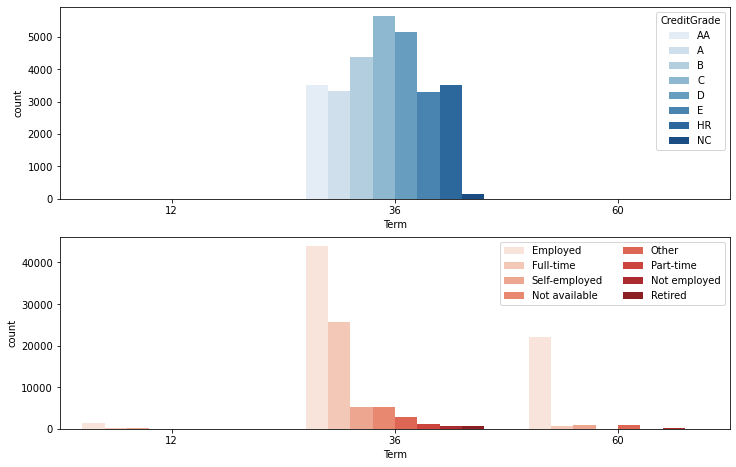

In [42]:
# create figure object
plt.figure(figsize = [12, 12])

# subplot 1: CreditGrade vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = sub_df, x = 'Term', hue = 'CreditGrade', palette = 'Blues')
 
# subplot 2: Term vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sb.countplot(data = sub_df, x = 'Term', hue = 'EmploymentStatus', palette = 'Reds')

# re-arrange legend to remove overlapping
ax.legend(ncol = 2) 

# re-arrange legend to remove overlapping
ax.legend(loc = 1, ncol = 2) 

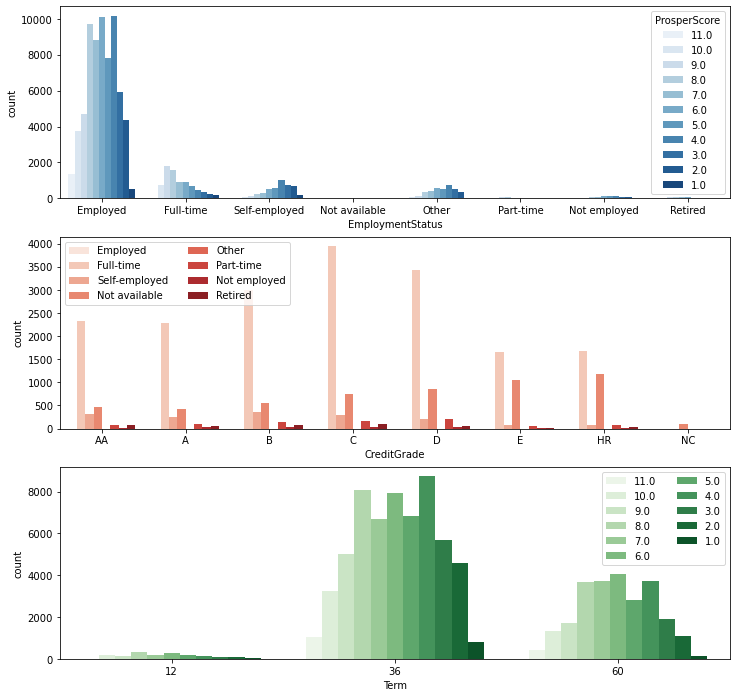

In [43]:
# create figure object
plt.figure(figsize = [12, 12])

# subplot 1: EmploymentStatus vs ProsperScore
plt.subplot(3, 1, 1)
sb.countplot(data = sub_df, x = 'EmploymentStatus', hue = 'ProsperScore', palette = 'Blues')
 
# subplot 2: CreditGrade vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sb.countplot(data = sub_df, x = 'CreditGrade', hue = 'EmploymentStatus', palette = 'Reds')

# re-arrange legend to reduce overlapping
ax.legend(ncol = 2) 

# subplot 3: ProsperScore vs. EmploymentStatus
ax = plt.subplot(3, 1, 3)
sb.countplot(data = sub_df, x = 'Term', hue = 'ProsperScore', palette = 'Greens')

# re-arrange legend to reduce overlapping
ax.legend(loc = 1, ncol = 2) 

**Observations:**

1. The imbalance of observations among the categories 
2. CreditGrade and ProsperScore display a normal distribution along all of the Terms
3. The distribution of Full-time against ProsperScore is right-tailed, suggesting applicants are evaluated favourably in this category. The reverse is true for the self-employed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Borrower APR did not appear to be strongly correlated with any single numerical feature. 
> 2. Relationships were observed between the main feature of interest (Borrower APR) and the categorical features. CreditGrade and ProsperScore were found to have a clear relationship with Borrwer APR, with rates of interest offered in according with the ranking of the application. Said otherwise, applicants with a "better" rating were offfered lower rates of interest. This chimes with offering competitive terms to applicants assessed as a lower credit risk.
> 3. Interestingly, the term of a loan is correlated with Borrower APR, with longer terms displaying less variation (as measured by the IQR) than shorter term loans. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. Some form of income (Employed, Full-time, Self-employed) is correlated with higher ranked CreditGrade and ProsperScore.
> 2. The self-employed however tend to have a lower ProsperScore than the Full-time and employed.

## Multivariate Exploration


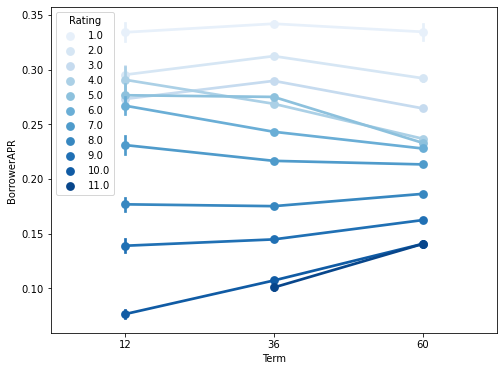

In [44]:
#create figure
fig = plt.figure(figsize=[8,6])

#create pointplot of BorrowerAPR with ProsperScorwe 
ax = sb.pointplot(data=df, x='Term', y='BorrowerAPR', hue='ProsperScore',
                   palette='Blues');
plt.legend(loc=2, title='Rating');

**Observations:**

- The results appear counter intuitive, with interest rates higher for longer term loans, for some ProsperScore levels.

C:\Users\noama\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


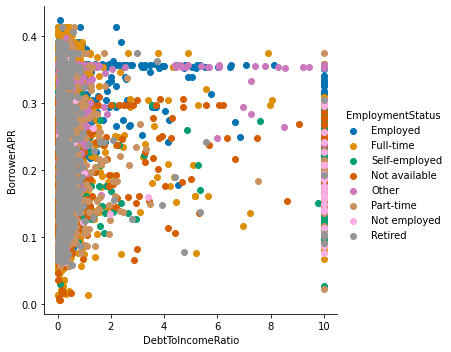

In [45]:
#scatter plot with a 3 variable encoded with color
g = sb.FacetGrid(data = sub_df, hue = 'EmploymentStatus', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'DebtToIncomeRatio', 'BorrowerAPR')
g.add_legend()

**Observations:**

- applicants not employed tend to have a higher DebtToIncomeRatio than applicants that are either Employed or Full-time. 

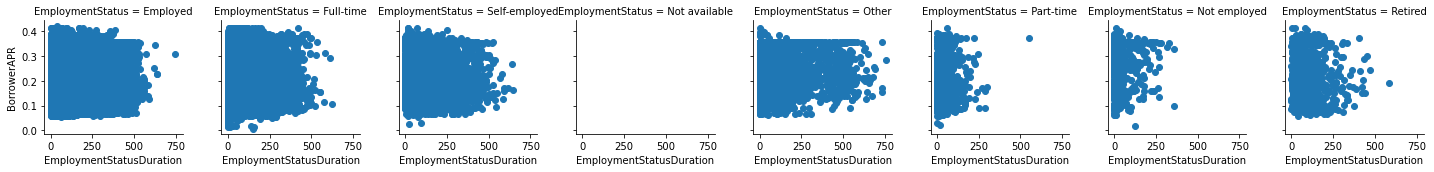

In [46]:
#scatter plots facetting by employedstatus
g = sb.FacetGrid(data = sub_df, col = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'EmploymentStatusDuration', 'BorrowerAPR')

**Observations:**

- No single employment status and duration is strongly correlated with Borrower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. As noted, longer term loans carry higher rates of interest. This trend is even more pronounced for loan applications with a lower PropserScore rating. 


### Were there any interesting or surprising interactions between features?

> 1. Counter intuitively, Borrower APR is not systematically different for applicants with a higher debt to income ratio. This is becuase the relationship may be moderated by other features.
> 2. BorrowerAPR increases for longer Term loans. The opposite could reasonably be expected with longer term loans generally carrying a lower risk profile as they have a longer time to accrue interest. Perthaps, principal at risk is weighted more heavily than return on loan (interest payments) among the profile of applicants in the dataset.